In [1]:
#'Core code for my DNN_From_Scratch '
#'For cat recongation' (no free lunch)

In [2]:
#import the data and librarys

import numpy as np
import matplotlib.pyplot as plt    # for ploting 
import h5py    # for processing .h5 files

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
# because the core_functions are editing all the time during the experimental process, two lines of code
# above make it possible that the functions below are auto-reloaded.
from core_functions import *

np.random.seed(1)

In [3]:

# The cell below is for importing data from a .h5 file; Different kinds of file might need different code.

In [4]:
# Import data from datafile 'datasets/train_catvnoncat.h5', which is from the Coursera DLS

train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r") 
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

0
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
non-cat


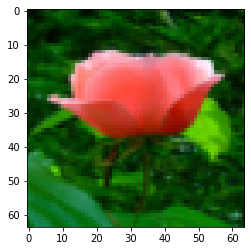

In [5]:
# Take a look at the data
index = 3
plt.imshow(train_set_x_orig[index])
print(str(train_set_y_orig[0,index]))
print(train_set_y_orig)
print(classes[train_set_y_orig[0,index]].decode('utf-8'))

In [6]:
# Data dimension
print(train_set_x_orig.shape)
print(train_set_y_orig.shape)

(209, 64, 64, 3)
(1, 209)


In [7]:
# process the data
# reshape the structure into (nx, m)
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T # -1 flatten the structure(64, 64, 3) into (12288)
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# We shoudl also Standardize data to have feature values between 0 and 1. Here we can simpliy divded data by 255
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print("shape of train_x: ", train_x.shape)
print("shape of test_x: ", test_x.shape)

shape of train_x:  (12288, 209)
shape of test_x:  (12288, 50)


In [8]:
#initialate parameters

n = train_x.shape[0]
layer_dims = [n,20,7,5,1] 
# A list of numbers which shows how many neurals in each layer; 20, 7 and 5 are from course example
L = len(layer_dims) # L indicates the number of times of propagation

In [9]:
# Define Neural Network model



def L_layer_model(X, Y, layer_dims, learning_rate=0.0075, num_iterations=100, print_cost=False):
    parameters = initialize_parameters(layer_dims)
    costs = [] # keep track of the cost so we can check the performance of our model
    
    # iterate num_iterations times
    
    for i in range(num_iterations):
        # forward propagation with X and initial parameters; 
        AL, caches = forward_propagation(X, parameters)
    
        #compute the cost
        cost = compute_cost(AL, Y)
    
        #backward propagation
        grads = backward_propagation(AL, Y, caches)
    
        #update parameters, print the cost changes
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # try printing costs to evaluate the model
        if print_cost and i % 100 == 0 or i == num_iterations-1:
            # Print the cost every 100 iterations and the last iteration
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
        
    return parameters, costs
    
    

In [10]:
# 翻过的错
# 1. 搞清楚输出输入端的数据类型和顺序；上面 L_layer_model 中一个AL输入comput_cost时为list而不是nparrry的bug就是因为
# 把AL和caches的顺序写反了！！！这个bug改了两天！！！
# 2. cost一直下不去，后来把learningrate从课程里的0.0075改成了0.0005，cost就降下去了；我也不知道为什么一样的数据，课程
# 能用0.0075但这里就不行。
# 3. 我的模型显然过拟合了high variance，train accuracy达到了0.999999而test accuracy才0.78(甚至会更低），课程里这两个数据分别为
# 0.985645和0.8；猜测可能是initial parameters的原因吧


In [11]:
parameters, costs = L_layer_model(train_x, train_set_y_orig, layer_dims, learning_rate=0.0005, num_iterations=4000, print_cost=True)

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6331274371521444
Cost after iteration 200: 0.5510535685733433
Cost after iteration 300: 0.6048865947156654
Cost after iteration 400: 0.46067947379747326
Cost after iteration 500: 0.5882064699877062
Cost after iteration 600: 0.4548125030708083
Cost after iteration 700: 0.31461179188619176
Cost after iteration 800: 0.19403797414589657
Cost after iteration 900: 0.10320560250667124
Cost after iteration 1000: 0.07478553304900237
Cost after iteration 1100: 0.06470359892980866
Cost after iteration 1200: 0.05927510357270751
Cost after iteration 1300: 0.05588669876186266
Cost after iteration 1400: 0.053600245241632594
Cost after iteration 1500: 0.0516563529858835
Cost after iteration 1600: 0.04993650153620625
Cost after iteration 1700: 0.04821507718414161
Cost after iteration 1800: 0.046256907854492234
Cost after iteration 1900: 0.043792346666930965
Cost after iteration 2000: 0.04049207145443906
Cost after iteration 2100: 0.

In [12]:
pred_y, caches = forward_propagation(test_x, parameters)
print(pred_y.shape)
print(pred_y[:, :20])

(1, 50)
[[0.99870278 0.99999974 0.9999788  0.99653856 0.97706706 0.95738892
  0.01258838 0.99999993 0.99995451 0.99999379 0.99999993 0.9981236
  0.99999948 0.99992806 0.0060142  0.9999902  0.01910547 0.99838689
  0.99497666 0.01371236]]


In [13]:
p = predict(train_x, train_set_y_orig, parameters)

Accuracy:  0.9999999999999998


In [14]:
p = predict(test_x, test_set_y_orig, parameters)

Accuracy:  0.78


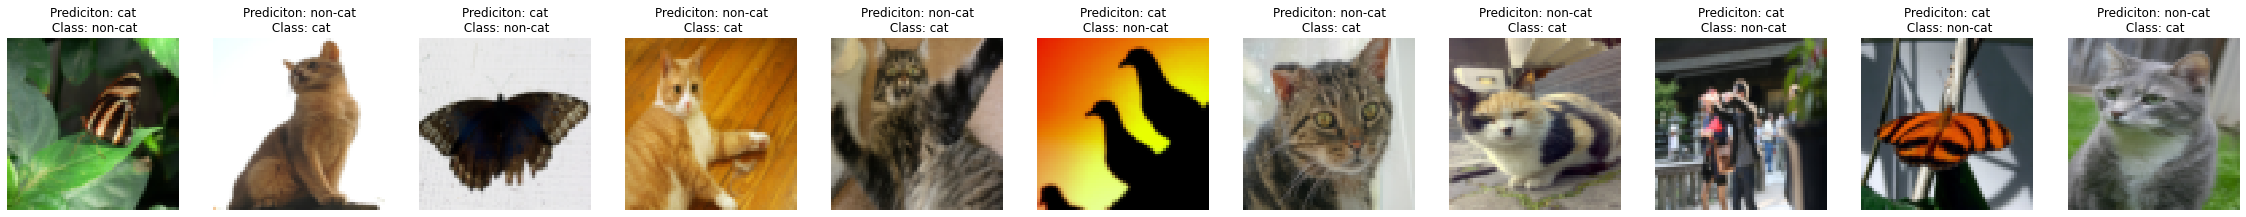

In [15]:
print_mislabeled_images(classes, test_x, test_set_y_orig, p)

Accuracy:  0.0
y= 0.0, my model predict it as a 'non-cat' picture.


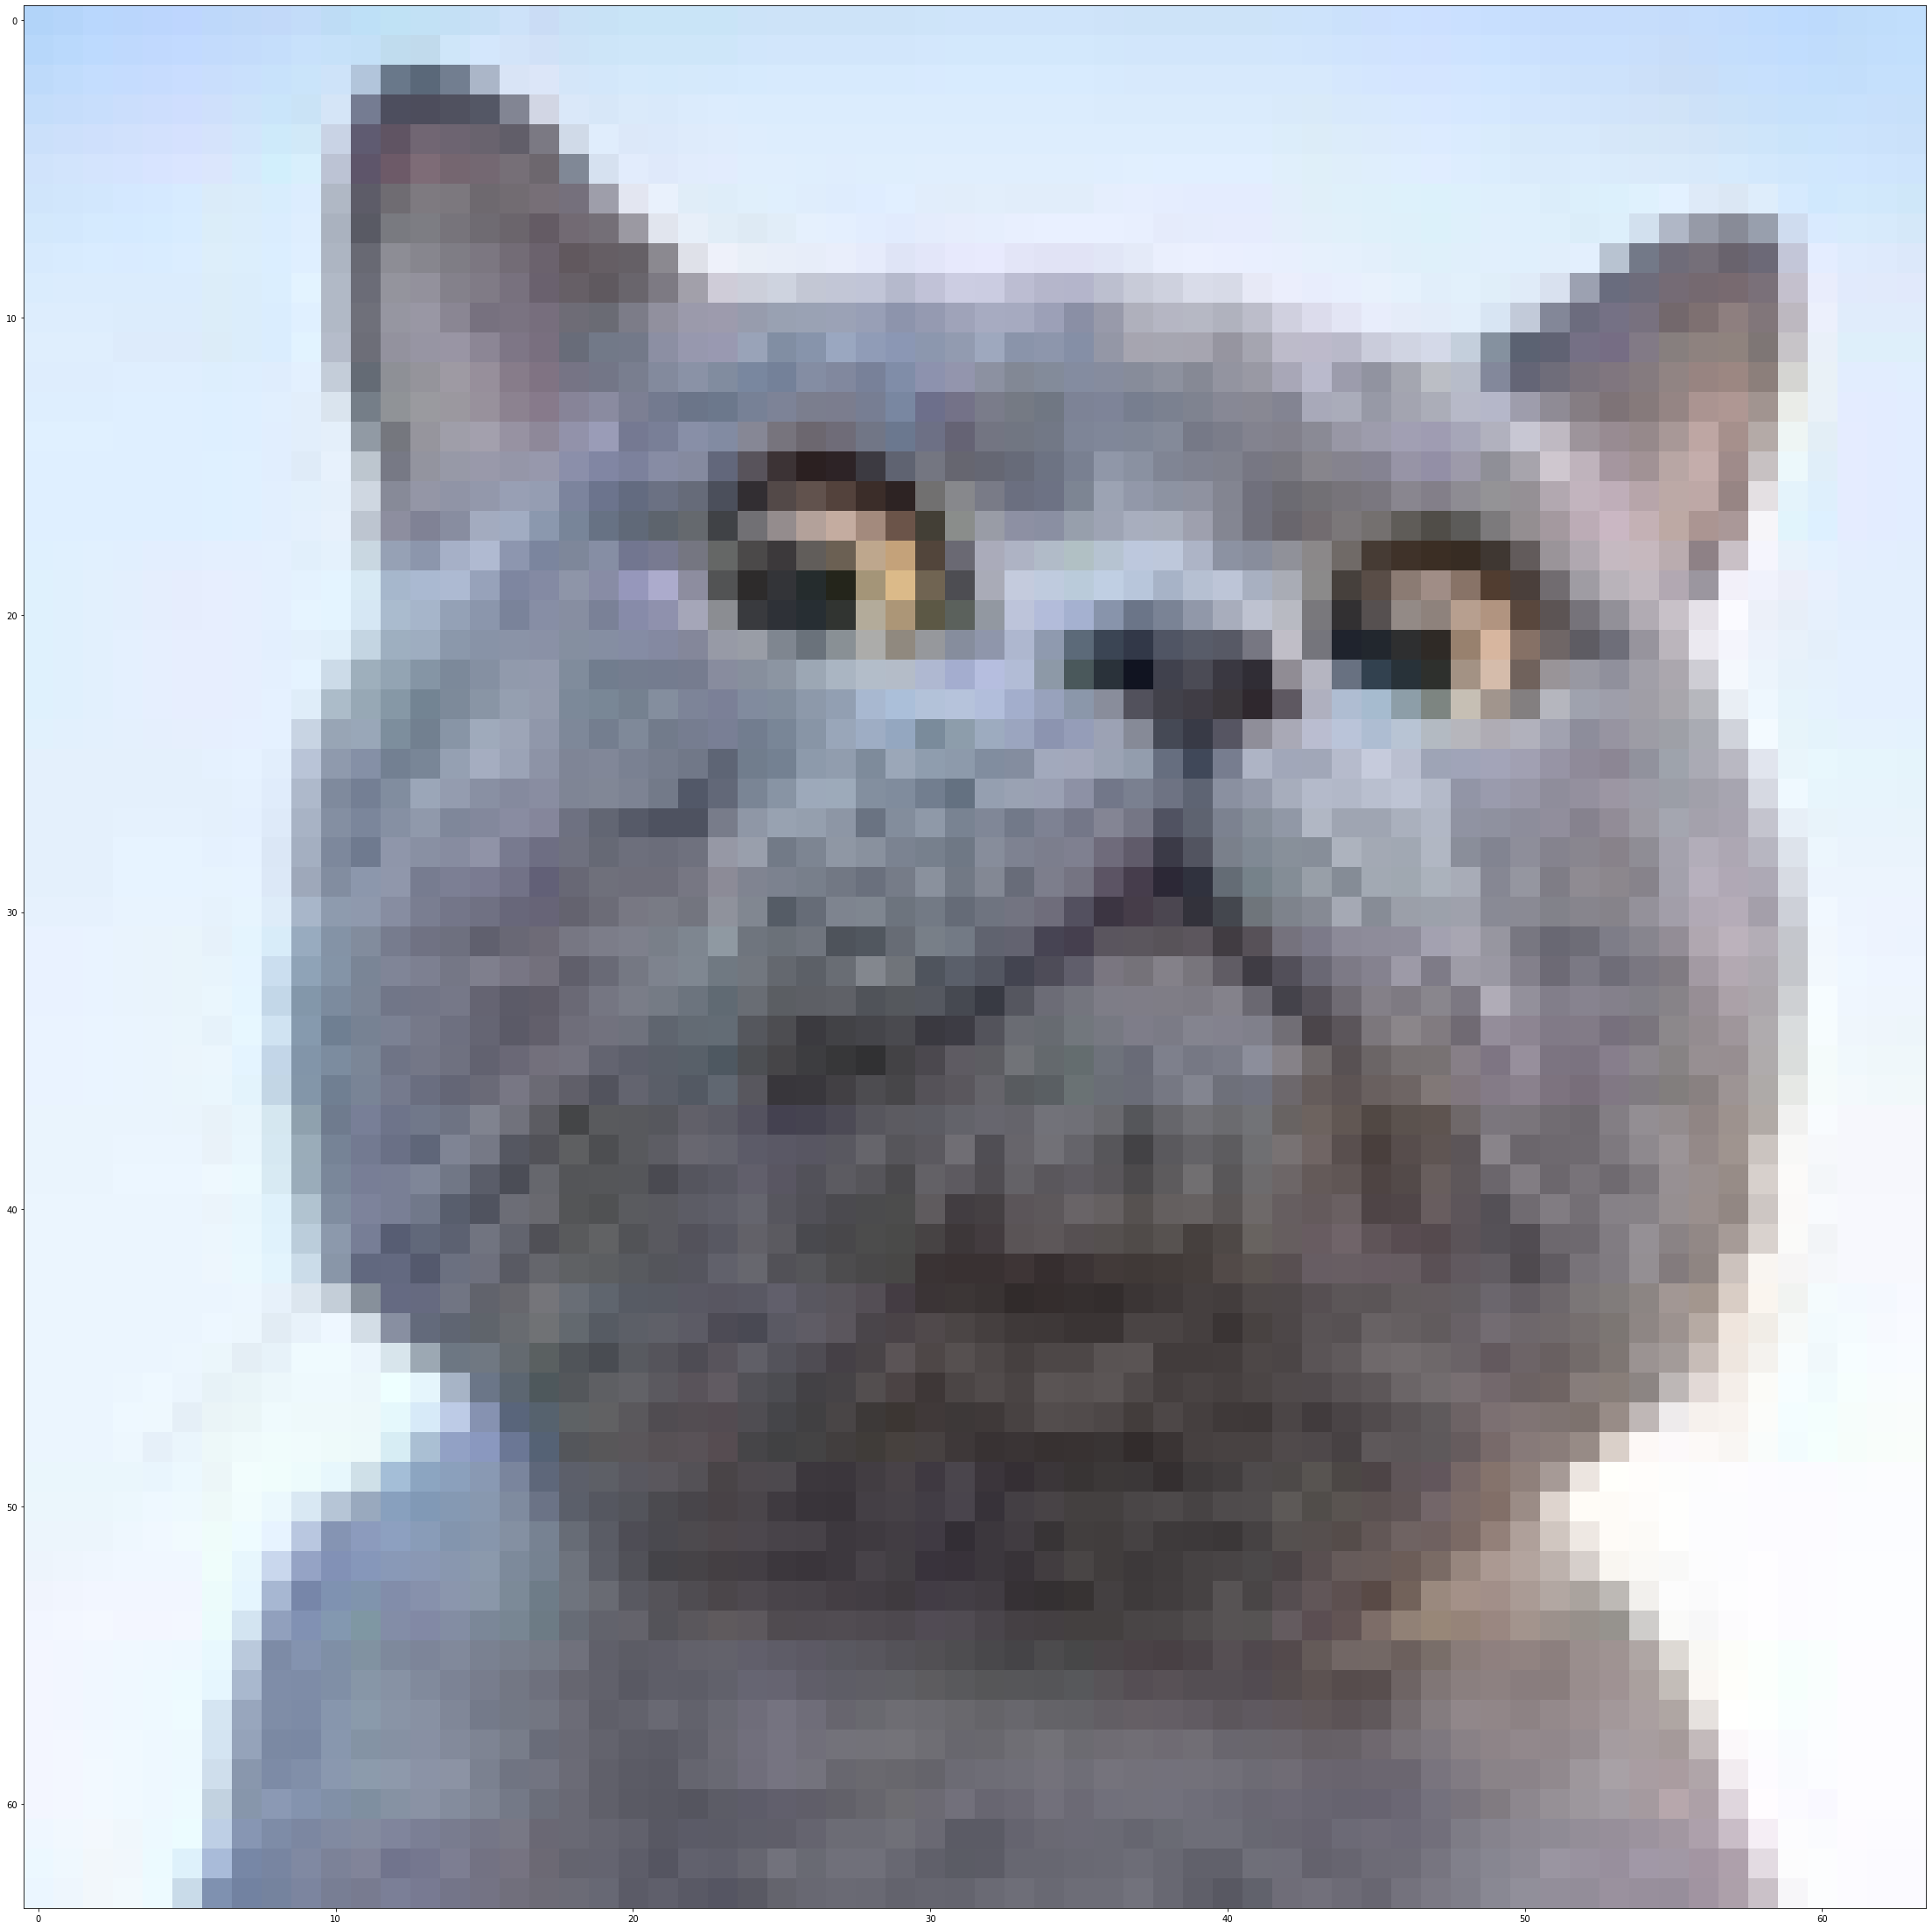

In [16]:
from PIL import Image
my_image = "mycattest.jpg"
my_label_y = [1]
num_px = 64

fname = my_image # if the image is in a folder, we need to add "folername/" infront the file name
image = np.array(Image.open(fname).resize((num_px, num_px))) #reshape the image to fit my propram
plt.imshow(image)

# process the raw data
image = image/255.
image = image.reshape((1,num_px*num_px*3)).T # our import data has the shape of(n,m), where n here particularly equals to 64*64*3 = 12288 
my_pred = predict(image, my_label_y, parameters)

print('y= ' + str(np.squeeze(my_pred)) + ', my model predict it as a \'' + classes[int(np.squeeze(my_pred))].decode('utf-8') + '\' picture.')



In [ ]:
# 课程里训练出来的模型是能识别出这是猫的，但是这里却识别不出来...而且可以从下面看出来预测值只有0.02，离threshold的0.5差了好远

In [23]:
my_p, cache = forward_propagation(image, parameters)
print(my_p)

[[0.01753889]]
